In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from itertools import combinations

In [184]:
# load data
data = pd.read_csv('../Data/Dataset3.csv' , delimiter=',', quotechar='"')
data.head(20)

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,"24,87","82,84","295,61",Clayey,rice,DAP
1,"28,69","96,65","178,96",laterite,Coconut,Good NPK
2,"20,27","81,64","270,44",silty clay,rice,MOP
3,"25,07","95,02","192,9",sandy,Coconut,Urea
4,"25,04","95,9","174,8",coastal,Coconut,Urea
5,"20,82","84,13","230,22",clay loam,rice,Urea
6,"25,95","93,41","172,05",alluvial,Coconut,Urea
7,"26,49","80,16","242,86",Clayey,rice,DAP
8,"25,01","95,59","165,81",coastal,Coconut,Urea
9,"21,87","80,19","224,56",silty clay,rice,Urea


# Equal_frequency_discretize

In [185]:
def equal_frequency_discretize(column_name , q=0):
    n= len(data[column_name])
    # define the number of quantiles with a formula
    if q == 0:
        q = math.ceil(1+10/3*math.log10(n))
    print(f"Number of quantiles: {q}")
    data.sort_values(by=[column_name], inplace=True)
    data.reset_index(drop=True, inplace=True)
    bin_size = len(data) // q+1
    discretized_column = [round(i // bin_size )for i in range(len(data))]
    data[f'{column_name}_E_F'] = discretized_column
    return data

equal_frequency_discretize("Temperature" , 3)
data.head(20)

Number of quantiles: 3


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_E_F
0,"20,05","80,35","208,58",silty clay,rice,Urea,0
1,"20,05","80,35","208,58",silty clay,rice,MOP,0
2,"20,08","83,29","263,64",Clayey,rice,MOP,0
3,"20,08","83,29","263,64",Clayey,rice,Urea,0
4,"20,13","81,6","262,72",Clayey,rice,MOP,0
5,"20,27","81,64","270,44",silty clay,rice,MOP,0
6,"20,28","82,12","191,95",sandy,Coconut,Urea,0
7,"20,28","82,12","191,95",sandy,Coconut,DAP,0
8,"20,28","82,89","241,97",Clayey,rice,MOP,0
9,"20,41","82,21","245,15",Clayey,rice,MOP,0


In [163]:
# 'Humidity'
equal_frequency_discretize("Humidity")
data.head()

Number of quantiles: 10


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_E_F,Humidity_E_F
0,"26,53","80,12","218,92",Clayey,rice,DAP,1,0
1,"26,53","80,12","218,92",Clayey,rice,Urea,1,0
2,"25,6","80,15","200,83",silty clay,rice,MOP,1,0
3,"26,49","80,16","242,86",Clayey,rice,DAP,1,0
4,"21,87","80,19","224,56",silty clay,rice,Urea,0,0


In [164]:
equal_frequency_discretize("Rainfall")
data.head()

Number of quantiles: 10


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_E_F,Humidity_E_F,Rainfall_E_F
0,"27,75","95,95","131,09",laterite,Coconut,Urea,2,8,0
1,"29,52","92,56","131,21",coastal,Coconut,Good NPK,2,6,0
2,"25,76","94,66","131,25",alluvial,Coconut,DAP,1,7,0
3,"25,76","94,66","131,25",alluvial,Coconut,Urea,1,7,0
4,"26,14","96,39","131,34",coastal,Coconut,MOP,1,8,0


In [165]:
import warnings
warnings.filterwarnings('ignore') # to ignore warnings

# Define a list of columns to process
columns_to_process = ['Temperature', 'Humidity', 'Rainfall']

for i in range(len(data)): # for each row
    for column in columns_to_process: # for each column
        if type(data[column][i]) == str: # if the value is a string
            if ',' in data[column][i]: # if comma is used as decimal separator
                data[column][i] = data[column][i].replace(',', '.') # replace comma with dot
            data[column][i] = float(data[column][i]) # convert to float
        else:
            data[column][i] = float(data[column][i]) # convert to float
data.head()

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_E_F,Humidity_E_F,Rainfall_E_F
0,27.75,95.95,131.09,laterite,Coconut,Urea,2,8,0
1,29.52,92.56,131.21,coastal,Coconut,Good NPK,2,6,0
2,25.76,94.66,131.25,alluvial,Coconut,DAP,1,7,0
3,25.76,94.66,131.25,alluvial,Coconut,Urea,1,7,0
4,26.14,96.39,131.34,coastal,Coconut,MOP,1,8,0


# Equal_width_discretize

In [166]:
def equal_width_discretize( column_name):
    n= len(data[column_name]) # number of rows
    num_bins =  1+10/3*math.log10(n) # number of bins
    min_value = data[column_name].min() # min value
    max_value = data[column_name].max()  # max value
    bin_width = (max_value - min_value) / num_bins  # bin width
    print(f"Number of bins: {num_bins}")
    discretized_column = [round( (x - min_value) / bin_width ) for x in data[column_name]] # discretized column
    data[f'{column_name}_E_W'] = discretized_column # add discretized column to the dataframe
    return data

equal_width_discretize( "Temperature") # discretize Temperature
equal_width_discretize( "Humidity") # discretize Humidity
equal_width_discretize( "Rainfall") # discretize Rainfall
data.head(12) # show the first 5 rows

Number of bins: 9.232740053260544
Number of bins: 9.232740053260544
Number of bins: 9.232740053260544


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_E_F,Humidity_E_F,Rainfall_E_F,Temperature_E_W,Humidity_E_W,Rainfall_E_W
0,27.75,95.95,131.09,laterite,Coconut,Urea,2,8,0,7,7,0
1,29.52,92.56,131.21,coastal,Coconut,Good NPK,2,6,0,9,6,0
2,25.76,94.66,131.25,alluvial,Coconut,DAP,1,7,0,5,7,0
3,25.76,94.66,131.25,alluvial,Coconut,Urea,1,7,0,5,7,0
4,26.14,96.39,131.34,coastal,Coconut,MOP,1,8,0,6,8,0
5,29.29,91.96,132.15,alluvial,Coconut,Urea,2,5,0,9,6,0
6,29.29,91.96,132.15,alluvial,Coconut,DAP,2,5,0,9,6,0
7,26.11,91.52,134.13,sandy,Coconut,Urea,1,5,0,6,5,0
8,26.11,91.52,134.13,sandy,Coconut,DAP,1,5,0,6,5,0
9,28.57,95.68,134.84,sandy,Coconut,DAP,2,8,0,8,7,0


In [167]:
column_val = 'Temperature_E_W'

def plot_classes(input_df, column= column_val):
    sns.countplot(x=column, data=input_df)
    plt.xlabel('classes')
    plt.ylabel('Count')
    plt.title('class distribution Temperature ')
    plt.show()

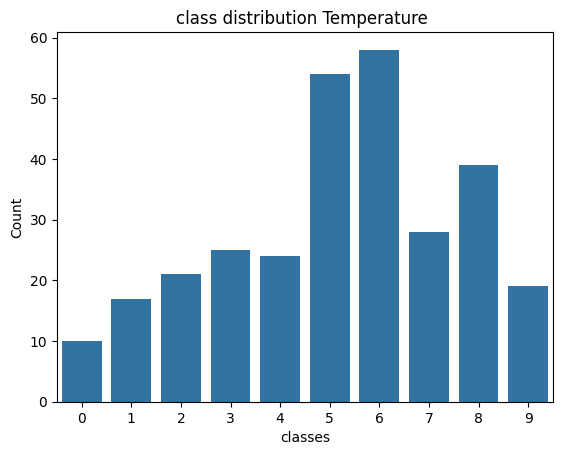

In [168]:
plot_classes(data , column_val)

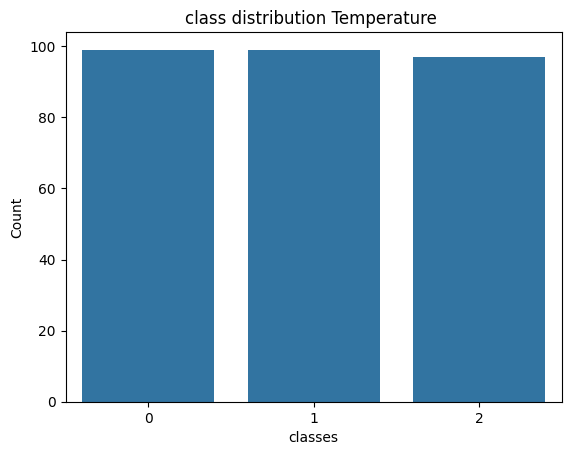

In [169]:
column_val = 'Temperature_E_F'
plot_classes(data , column_val)

# l’algorithme Apriori

In [192]:
grouped_temp = data.groupby('Temperature_E_F')['Temperature']
# get the max value of each group	
max_temp = grouped_temp.max()
print(max_temp)

Temperature_E_F
0    24,87
1    26,76
2    29,87
Name: Temperature, dtype: object


In [ ]:
def Temperature_class(temp):
    if temp < 23:
        return 'Low'
    elif temp < 26:
        return 'Medium'
    else:
        return 'High'

In [171]:
data['Temperature_E_F'] = data['Temperature_E_F'].replace(0,'Low')
data['Temperature_E_F'] = data['Temperature_E_F'].replace(1,'Medium')
data['Temperature_E_F'] = data['Temperature_E_F'].replace(2,'High')

transactions = data[['Temperature_E_F', 'Soil', 'Crop', 'Fertilizer']].values.tolist()
transactions[:10]

[['High', 'laterite', 'Coconut', 'Urea'],
 ['High', 'coastal', 'Coconut', 'Good NPK'],
 ['Medium', 'alluvial', 'Coconut', 'DAP'],
 ['Medium', 'alluvial', 'Coconut', 'Urea'],
 ['Medium', 'coastal', 'Coconut', 'MOP'],
 ['High', 'alluvial', 'Coconut', 'Urea'],
 ['High', 'alluvial', 'Coconut', 'DAP'],
 ['Medium', 'sandy', 'Coconut', 'Urea'],
 ['Medium', 'sandy', 'Coconut', 'DAP'],
 ['High', 'sandy', 'Coconut', 'DAP']]

In [172]:
#transform a temperature number to a temperature class (low, medium, high)
def transform_temperature(temperature):
    if temperature < 20:
        return 'Low'
    elif 20 <= temperature <= 30:
        return 'Medium'
    else:
        return 'High'
    

In [173]:
def frequency(transactions, itemset):
    count = 0
    for transaction in transactions:
        if itemset.issubset(transaction):
            count += 1
    return count

In [174]:
def generate_candidates(frequent_itemsets, k):
    candidates = set()
    for i in range(len(frequent_itemsets) - 1):
        for j in range(i + 1, len(frequent_itemsets)):
            # Joining step
            new_candidate = frequent_itemsets[i][0].union(frequent_itemsets[j][0])
            # Pruning step
            if len(new_candidate) == k:
                candidates.add(tuple(sorted(new_candidate)))
    return [set(candidate) for candidate in candidates]
    #return [item for item in candidates if len(item)==k]

In [175]:
def get_frequent_itemsets(transactions, min_support):
    # Get unique items
    unique_items = set(item for transaction in transactions for item in transaction)
    
    # List to save all itemsets that verify the min_support
    frequent_itemsets = []
    k = 1
    
    # First iteration candidates
    candidate_itemsets = [set([item]) for item in unique_items]
    
    while True:
        # List to save each iteration's frequent itemsets with their support value
        frequent_itemsets_k = []
        
        # Calculate support
        for itemset in candidate_itemsets:
            support = frequency(transactions, itemset)
            
            if support >= min_support:
                frequent_itemsets_k.append((itemset, support))
                
        # No itemsets satisfy the min_support
        if not frequent_itemsets_k:
            break
        
        # Save the new itemsets
        frequent_itemsets.extend(frequent_itemsets_k)
        k += 1
        
        # Generate candidates for the next iteration
        candidate_itemsets = generate_candidates(frequent_itemsets_k, k)

    return frequent_itemsets

In [176]:
min_support = 7 # Set your desired minimum support 
frequent_itemsets = get_frequent_itemsets(transactions, min_support)
freq_itemsets = pd.DataFrame(frequent_itemsets, columns=['itemsets', 'support'])
freq_itemsets

,itemsets,support
0,{MOP},75
1,{High},97
2,{Coconut},152
3,{Urea},101
4,{coastal},50
...,...,...
150,"{MOP, Medium, Coconut, coastal}",8
151,"{MOP, High, Coconut, sandy}",7
152,"{Urea, Clayey, Low, rice}",13
153,"{High, Coconut, Urea, sandy}",7


**Les règles d'association** sont utilisées dans l'exploration de données pour découvrir des relations fréquentes entre les variables d'un ensemble de données.

In [177]:
# Modify the association_rules format to store rules as sets
def generate_association_rules(frequent_itemsets):
    association_rules = []
    for itemset, support in frequent_itemsets:
        for i in range(1, len(itemset)):
            for antecedent in combinations(itemset, i):
                consequent = itemset - set(antecedent)
                association_rules.append((set(antecedent), consequent, support))
    return association_rules

# Now, modify the code where you generate frequent itemsets
association_rules = generate_association_rules(frequent_itemsets)
association_rules_df = pd.DataFrame(association_rules, columns=['antecedent', 'consequent', 'support'])
association_rules_df

,antecedent,consequent,support
0,{Medium},{clay loam},11
1,{clay loam},{Medium},11
2,{Urea},{alluvial},12
3,{alluvial},{Urea},12
4,{DAP},{laterite},9
...,...,...,...
669,"{Urea, coastal}","{High, Coconut}",10
670,"{High, Coconut, Urea}",{coastal},10
671,"{High, Coconut, coastal}",{Urea},10
672,"{High, Urea, coastal}",{Coconut},10


**Confiance :** La confiance mesure la probabilité conditionnelle que, si un client achète un ensemble d'articles, il achètera également un autre article.

Confiance (A ⇒ B) = P(B/A) = support(A ∪ B) / support(A)

In [178]:
def calculate_confidence(transaction_data, antecedent, consequent):
    # Nombre de transactions contenant l'antécédent et le conséquent
    support_A_and_B = sum(1 for transaction in transaction_data if antecedent.issubset(transaction) and consequent.issubset(transaction))

    # Nombre de transactions contenant l'antécédent
    support_A = sum(1 for transaction in transaction_data if antecedent.issubset(transaction))

    # Calculer la confiance
    confidence = support_A_and_B / support_A
    return confidence

transactions = [set(transaction) for transaction in transactions]
association_rules_df['antecedent'] = association_rules_df['antecedent'].apply(set)
association_rules_df['consequent'] = association_rules_df['consequent'].apply(set)
min_confidence = 0.5 # Set your desired minimum confidence
# displaying values above min_confidence
association_rules_df['confidence'] = association_rules_df.apply(lambda row: calculate_confidence(transactions, row['antecedent'], row['consequent']), axis=1) 
association_rules_df = association_rules_df[association_rules_df['confidence'] >= min_confidence].reset_index(drop=True)
association_rules_df

,antecedent,consequent,support,confidence
0,{DAP},{rice},47,0.546512
1,{Clayey},{rice},54,1.000000
2,{Clayey},{Low},34,0.629630
3,{laterite},{High},17,0.607143
4,{laterite},{Coconut},28,1.000000
...,...,...,...,...
136,"{High, Urea, sandy}",{Coconut},7,1.000000
137,"{Coconut, Urea, sandy}",{High},7,0.538462
138,"{Urea, coastal}","{High, Coconut}",10,0.526316
139,"{High, Urea, coastal}",{Coconut},10,1.000000


LIFT :

In [179]:
#lift(A->B) = confidence(A=>B) / support(B)
def calculate_lift(left, right):
    # Nombre de transactions contenant l'antécédent et le conséquent
    support_A_and_B = sum(1 for transaction in transactions if left.issubset(transaction) and right.issubset(transaction))

    # Nombre de transactions contenant l'antécédent
    support_A = sum(1 for transaction in transactions if left.issubset(transaction))

    # Nombre de transactions contenant le conséquent
    support_B = sum(1 for transaction in transactions if right.issubset(transaction))

    # Calculer la confiance
    confidence = support_A_and_B / support_A

    # Calculer le lift
    lift = confidence / support_B
    return lift

association_rules_df['lift'] = association_rules_df.apply(lambda row: calculate_lift(row['antecedent'], row['consequent']), axis=1)
association_rules_df = association_rules_df[association_rules_df['confidence'] >= min_confidence].reset_index(drop=True)
association_rules_df

,antecedent,consequent,support,confidence,lift
0,{DAP},{rice},47,0.546512,0.003822
1,{Clayey},{rice},54,1.000000,0.006993
2,{Clayey},{Low},34,0.629630,0.006360
3,{laterite},{High},17,0.607143,0.006259
4,{laterite},{Coconut},28,1.000000,0.006579
...,...,...,...,...,...
136,"{High, Urea, sandy}",{Coconut},7,1.000000,0.006579
137,"{Coconut, Urea, sandy}",{High},7,0.538462,0.005551
138,"{Urea, coastal}","{High, Coconut}",10,0.526316,0.006120
139,"{High, Urea, coastal}",{Coconut},10,1.000000,0.006579


In [180]:
def calculate_cosine(left, right):
    # Nombre de transactions contenant l'antécédent et le conséquent
    support_A_and_B = sum(1 for transaction in transactions if left.issubset(transaction) and right.issubset(transaction))

    # Nombre de transactions contenant l'antécédent
    support_A = sum(1 for transaction in transactions if left.issubset(transaction))

    # Nombre de transactions contenant le conséquent
    support_B = sum(1 for transaction in transactions if right.issubset(transaction))

    # Calculer le cosine
    cosine = support_A_and_B / math.sqrt(support_A * support_B)
    return cosine

association_rules_df['cosine'] = association_rules_df.apply(lambda row: calculate_cosine(row['antecedent'], row['consequent']), axis=1)
association_rules_df

,antecedent,consequent,support,confidence,lift,cosine
0,{DAP},{rice},47,0.546512,0.003822,0.423819
1,{Clayey},{rice},54,1.000000,0.006993,0.614510
2,{Clayey},{Low},34,0.629630,0.006360,0.465012
3,{laterite},{High},17,0.607143,0.006259,0.326200
4,{laterite},{Coconut},28,1.000000,0.006579,0.429198
...,...,...,...,...,...,...
136,"{High, Urea, sandy}",{Coconut},7,1.000000,0.006579,0.214599
137,"{Coconut, Urea, sandy}",{High},7,0.538462,0.005551,0.197124
138,"{Urea, coastal}","{High, Coconut}",10,0.526316,0.006120,0.247385
139,"{High, Urea, coastal}",{Coconut},10,1.000000,0.006579,0.256495


In [181]:
def calculate_jaccard(left, right):
    # Nombre de transactions contenant l'antécédent et le conséquent
    support_A_and_B = sum(1 for transaction in transactions if left.issubset(transaction) and right.issubset(transaction))

    # Nombre de transactions contenant l'antécédent
    support_A = sum(1 for transaction in transactions if left.issubset(transaction))

    # Nombre de transactions contenant le conséquent
    support_B = sum(1 for transaction in transactions if right.issubset(transaction))

    # Calculer le jaccard
    jaccard = support_A_and_B / (support_A + support_B - support_A_and_B)
    return jaccard

association_rules_df['jaccard'] = association_rules_df.apply(lambda row: calculate_jaccard(row['antecedent'], row['consequent']), axis=1)
association_rules_df

,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{DAP},{rice},47,0.546512,0.003822,0.423819,0.258242
1,{Clayey},{rice},54,1.000000,0.006993,0.614510,0.377622
2,{Clayey},{Low},34,0.629630,0.006360,0.465012,0.285714
3,{laterite},{High},17,0.607143,0.006259,0.326200,0.157407
4,{laterite},{Coconut},28,1.000000,0.006579,0.429198,0.184211
...,...,...,...,...,...,...,...
136,"{High, Urea, sandy}",{Coconut},7,1.000000,0.006579,0.214599,0.046053
137,"{Coconut, Urea, sandy}",{High},7,0.538462,0.005551,0.197124,0.067961
138,"{Urea, coastal}","{High, Coconut}",10,0.526316,0.006120,0.247385,0.105263
139,"{High, Urea, coastal}",{Coconut},10,1.000000,0.006579,0.256495,0.065789


In [182]:
# exprimentation des differentes valeurs de min support et min confidence
min_support = [20 , 40 , 60]
min_confidence = [0.4 , 0.5 , 0.6]

# Iterate over min support values
for support in min_support:
    # Iterate over min confidence values
    for confidence in min_confidence:
        # Get frequent itemsets
        frequent_itemsets = get_frequent_itemsets(transactions, support)
        # Generate association rules
        association_rules = generate_association_rules(frequent_itemsets)
        # Convert association rules to a dataframe
        association_rules_df = pd.DataFrame(association_rules, columns=['antecedent','consequent', 'support'])
        # Calculate confidence
        association_rules_df['confidence'] = association_rules_df.apply(lambda row: calculate_confidence(transactions, row['antecedent'], row['consequent']), axis=1) 
        # Filter by confidence
        association_rules_df = association_rules_df[association_rules_df['confidence'] >= confidence].reset_index(drop=True)
        # Calculate lift
        association_rules_df['lift'] = association_rules_df.apply(lambda row: calculate_lift(row['antecedent'], row['consequent']), axis=1)
        # Filter by confidence
        association_rules_df = association_rules_df[association_rules_df['confidence'] >= confidence].reset_index(drop=True)
        # Calculate cosine
        association_rules_df['cosine'] = association_rules_df.apply(lambda row: calculate_cosine(row['antecedent'], row['consequent']), axis=1)
        # Calculate jaccard
        association_rules_df['jaccard'] = association_rules_df.apply(lambda row: calculate_jaccard(row['antecedent'], row['consequent']), axis=1)
        # Print results using data frame 
        print(f"Support: {support}, Confidence: {confidence}")
        display(association_rules_df.head())

Support: 20, Confidence: 0.4


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{DAP},{rice},47,0.546512,0.003822,0.423819,0.258242
1,{Clayey},{rice},54,1.000000,0.006993,0.614510,0.377622
2,{Clayey},{Low},34,0.629630,0.006360,0.465012,0.285714
3,{DAP},{Coconut},39,0.453488,0.002983,0.341109,0.195980
4,{laterite},{Coconut},28,1.000000,0.006579,0.429198,0.184211


Support: 20, Confidence: 0.5


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{DAP},{rice},47,0.546512,0.003822,0.423819,0.258242
1,{Clayey},{rice},54,1.000000,0.006993,0.614510,0.377622
2,{Clayey},{Low},34,0.629630,0.006360,0.465012,0.285714
3,{laterite},{Coconut},28,1.000000,0.006579,0.429198,0.184211
4,{Good NPK},{High},20,0.606061,0.006248,0.353498,0.181818


Support: 20, Confidence: 0.6


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{Clayey},{rice},54,1.000000,0.006993,0.614510,0.377622
1,{Clayey},{Low},34,0.629630,0.006360,0.465012,0.285714
2,{laterite},{Coconut},28,1.000000,0.006579,0.429198,0.184211
3,{Good NPK},{High},20,0.606061,0.006248,0.353498,0.181818
4,{High},{Coconut},86,0.886598,0.005833,0.708257,0.527607


Support: 40, Confidence: 0.4


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{sandy},{Coconut},48,1.000000,0.006579,0.561951,0.315789
1,{coastal},{Coconut},50,1.000000,0.006579,0.573539,0.328947
2,{Low},{silty clay},46,0.464646,0.007148,0.573434,0.389831
3,{silty clay},{Low},46,0.707692,0.007148,0.573434,0.389831
4,{Urea},{rice},48,0.475248,0.003323,0.399404,0.244898


Support: 40, Confidence: 0.5


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{sandy},{Coconut},48,1.000000,0.006579,0.561951,0.315789
1,{coastal},{Coconut},50,1.000000,0.006579,0.573539,0.328947
2,{silty clay},{Low},46,0.707692,0.007148,0.573434,0.389831
3,{DAP},{rice},47,0.546512,0.003822,0.423819,0.258242
4,{Clayey},{rice},54,1.000000,0.006993,0.614510,0.377622


Support: 40, Confidence: 0.6


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{sandy},{Coconut},48,1.000000,0.006579,0.561951,0.315789
1,{coastal},{Coconut},50,1.000000,0.006579,0.573539,0.328947
2,{silty clay},{Low},46,0.707692,0.007148,0.573434,0.389831
3,{Clayey},{rice},54,1.000000,0.006993,0.614510,0.377622
4,{High},{Coconut},86,0.886598,0.005833,0.708257,0.527607


Support: 60, Confidence: 0.4


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{High},{Coconut},86,0.886598,0.005833,0.708257,0.527607
1,{Coconut},{High},86,0.565789,0.005833,0.708257,0.527607
2,{silty clay},{rice},65,1.000000,0.006993,0.674200,0.454545
3,{rice},{silty clay},65,0.454545,0.006993,0.674200,0.454545
4,{Low},{rice},89,0.898990,0.006287,0.748005,0.581699


Support: 60, Confidence: 0.5


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{High},{Coconut},86,0.886598,0.005833,0.708257,0.527607
1,{Coconut},{High},86,0.565789,0.005833,0.708257,0.527607
2,{silty clay},{rice},65,1.000000,0.006993,0.674200,0.454545
3,{Low},{rice},89,0.898990,0.006287,0.748005,0.581699
4,{rice},{Low},89,0.622378,0.006287,0.748005,0.581699


Support: 60, Confidence: 0.6


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{High},{Coconut},86,0.886598,0.005833,0.708257,0.527607
1,{silty clay},{rice},65,1.000000,0.006993,0.674200,0.454545
2,{Low},{rice},89,0.898990,0.006287,0.748005,0.581699
3,{rice},{Low},89,0.622378,0.006287,0.748005,0.581699
